In [21]:
# Import SQLAlchemy dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine,inspect, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session

#Dependencies for analysis
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [22]:
# Create engine & connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)
conn = engine.connect()

In [23]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [24]:
# Map measurement and station classes (saving references)
Measurement = Base.classes.measurement
Station = Base.classes.station

In [25]:
# create a session
session = Session(engine)

# Precipitation Analysis

In [36]:
# Retrieve the last 12 months of precipitation data
# query to retreieve latest date
lastest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

#query to retrieve 365 days from lastest_date
first_date = dt.date(2017,8, 23) - dt.timedelta(days=365)

one_year_precipitation = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()

In [55]:
# Creating dataframe
precipitation_df = pd.DataFrame(one_year_precipitation, columns=['Date', 'Precipitation'])
# precipitation_df.head()

#reset the index
# precipitation_df.set_index(precipitation_df['Date'], inplace=True)
precipitation_df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


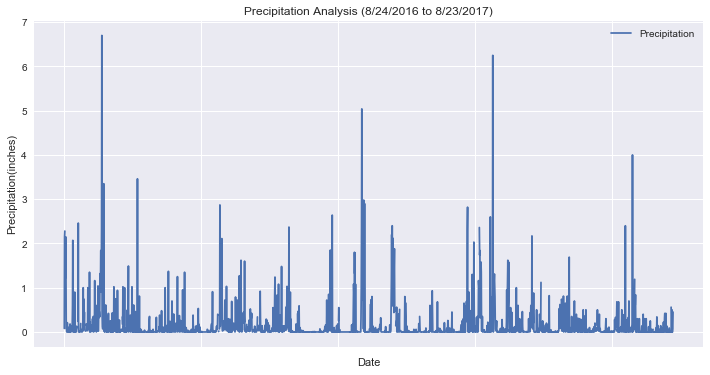

In [44]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

precipitation_df.plot('Date', 'Precipitation',figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Precipitation Analysis (8/24/2016 to 8/23/2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()